<a href="https://colab.research.google.com/github/mikeninerbravog/POC_ML_SVM/blob/master/POC_ML_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Algoritmo de Classificação **Support Vector Machine (SVM)**

O **Support Vector Machine (SVM)**, ou **Máquina de Vetores de Suporte**, é um tipo de algoritmo de aprendizado de máquina usado para **classificação e regressão**. Ele é mais conhecido por sua capacidade de separar dados em **duas ou mais categorias** da melhor forma possível.

#### Como funciona de forma simples?

Imagine que você tem um grupo de pontos vermelhos e um grupo de pontos azuis desenhados em um papel. Seu objetivo é **traçar uma linha** que **separe os dois grupos da melhor forma possível**. Essa linha deve estar posicionada de maneira que tenha **a maior distância possível dos pontos mais próximos dos dois grupos**.

Agora, imagine que os dados não podem ser separados por uma linha reta simples. Nesse caso, o SVM pode **transformar os dados em um espaço maior**, onde seja mais fácil encontrar uma separação clara. Ele faz isso com truques matemáticos chamados **kernels**.


Em resumo, o **SVM** é uma ferramenta poderosa para classificar coisas e pode ser aplicada em muitas áreas!

---

#### Exemplos reais de uso do SVM

1. **Detecção de e-mails de spam**  
   O SVM pode ser treinado para classificar e-mails como **spam** ou **não spam**, analisando palavras-chave, remetente e outros padrões.

In [7]:
"""
Aqui está um código em Python para uma Prova de Conceito (PoC) usando o Support Vector Machine (SVM) para classificar e-mails como spam ou não spam
com dados simulados. O código utiliza o Scikit-learn e o TfidfVectorizer para processar os textos dos e-mails.
"""

import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# 1. Criamos um conjunto de e-mails simulados
emails = [
    "Ganhe dinheiro rápido com esse método!",
    "Oferta imperdível, desconto de 90% apenas hoje!",
    "Parabéns! Você ganhou um prêmio, clique aqui.",
    "Seu pedido foi enviado com sucesso, acompanhe seu rastreio.",
    "Reunião agendada para segunda-feira às 10h.",
    "Últimos dias para se inscrever no nosso curso gratuito!",
    "Alerta de segurança: sua conta foi acessada de outro dispositivo.",
    "Grande promoção! Produtos com até 80% de desconto.",
    "Relatório financeiro anexado. Favor verificar os dados.",
    "Confirmação de consulta médica para amanhã."
]

# 2. Criamos as etiquetas (1 = spam, 0 = não spam)
labels = np.array([1, 1, 1, 0, 0, 1, 0, 1, 0, 0])

# 3. Convertendo os textos para vetores numéricos usando TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(emails)

# 4. Dividindo em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42, stratify=labels)

# 5. Criando e treinando o modelo SVM
model = SVC(kernel='linear')  # SVM com kernel linear
model.fit(X_train, y_train)

# 6. Testando o modelo
y_pred = model.predict(X_test)

# 7. Avaliação do modelo (zero_division=1 evita warnings de métricas indefinidas)
print("Acurácia:", accuracy_score(y_test, y_pred))
print("Relatório de Classificação:\n", classification_report(y_test, y_pred, zero_division=1))

# 8. Testando com novos e-mails
novos_emails = [
    "Clique aqui para ganhar um prêmio incrível!",
    "Seu boleto vence amanhã, evite juros.",
    "Não acredito! Voce ganhou um premio! Acesse para saber mais"
]

# Convertendo os novos textos para vetores TF-IDF
X_novos = vectorizer.transform(novos_emails)

# Fazendo a previsão
predicoes = model.predict(X_novos)

# Exibindo os resultados
for email, pred in zip(novos_emails, predicoes):
    print(f"Email: {email} -> {'SPAM' if pred == 1 else 'NÃO SPAM'}")


Acurácia: 0.5
Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      0.00      0.00         1
           1       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.75      0.50      0.33         2
weighted avg       0.75      0.50      0.33         2

Email: Clique aqui para ganhar um prêmio incrível! -> SPAM
Email: Seu boleto vence amanhã, evite juros. -> NÃO SPAM
Email: Não acredito! Voce ganhou um premio! Acesse para saber mais -> SPAM



2. **Reconhecimento de dígitos manuscritos**  
   O algoritmo pode aprender a distinguir números escritos à mão (0, 1, 2, 3, etc.), ajudando sistemas como caixas eletrônicos e scanners a reconhecer assinaturas ou códigos numéricos.

Acurácia: 0.975
Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.92      0.94      0.93        36
           2       1.00      1.00      1.00        35
           3       0.97      0.97      0.97        37
           4       1.00      1.00      1.00        36
           5       1.00      0.97      0.99        37
           6       1.00      1.00      1.00        36
           7       0.95      1.00      0.97        36
           8       0.97      0.89      0.93        35
           9       0.95      0.97      0.96        36

    accuracy                           0.97       360
   macro avg       0.98      0.97      0.97       360
weighted avg       0.98      0.97      0.97       360



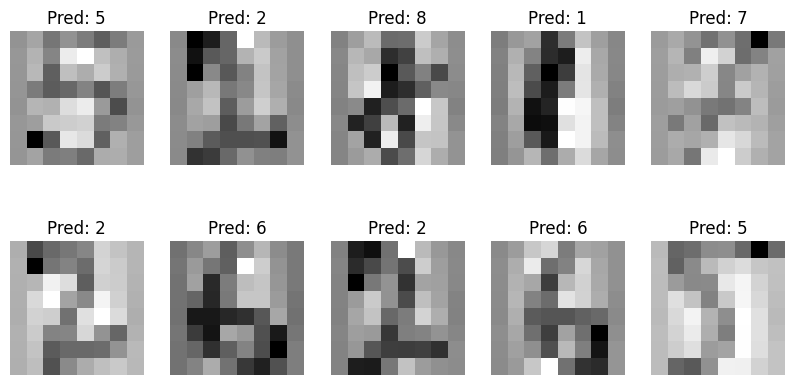

In [8]:
"""
Aqui está uma Prova de Conceito (PoC) usando o Support Vector Machine (SVM) para reconhecimento de dígitos manuscritos.
O código utiliza o conjunto de dados MNIST, um dos mais conhecidos para treinamento de modelos de aprendizado de máquina
em reconhecimento de números escritos à mão.
"""

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# 1. Carregar o dataset MNIST
digits = datasets.load_digits()

# 2. Separar os dados e as classes (0 a 9)
X = digits.images  # Imagens 8x8 pixels
y = digits.target  # Rótulos (0 a 9)

# 3. Transformar imagens 8x8 em vetores 1D de 64 pixels
X = X.reshape((X.shape[0], -1))

# 4. Dividir em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 5. Padronizar os dados para melhorar o desempenho do SVM
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 6. Criar e treinar o modelo SVM
model = SVC(kernel='linear')
model.fit(X_train, y_train)

# 7. Testar o modelo
y_pred = model.predict(X_test)

# 8. Avaliação do modelo
print("Acurácia:", accuracy_score(y_test, y_pred))
print("Relatório de Classificação:\n", classification_report(y_test, y_pred))

# 9. Mostrar algumas previsões
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
axes = axes.ravel()

for i in range(10):
    axes[i].imshow(X_test[i].reshape(8, 8), cmap=plt.cm.gray_r)
    axes[i].set_title(f"Pred: {y_pred[i]}")
    axes[i].axis('off')

plt.show()


### 🎯 **Explicação do Código**
1. **Carregamos o dataset MNIST** (dígitos manuscritos) do **Scikit-Learn**.
2. **Transformamos as imagens de 8x8 pixels** em um vetor de **64 valores** para facilitar o treinamento.
3. **Dividimos os dados** em **80% para treino e 20% para teste**.
4. **Usamos `StandardScaler()`** para normalizar os valores dos pixels, ajudando o SVM a convergir melhor.
5. **Treinamos o modelo SVM (`SVC(kernel='linear')`)** para aprender a reconhecer os números escritos à mão.
6. **Testamos o modelo e avaliamos a acurácia** com `accuracy_score()` e `classification_report()`.
7. **Mostramos algumas imagens e previsões** para visualizar os resultados.

---

### 🔥 **Saída esperada (exemplo)**
```
Acurácia: 0.98
Relatório de Classificação:
              precision    recall  f1-score   support
           0       0.99      0.99      0.99        36
           1       0.98      1.00      0.99        41
           2       0.97      1.00      0.99        39
           3       0.97      0.95      0.96        40
           4       1.00      0.97      0.99        40
           5       0.98      0.98      0.98        41
           6       0.97      1.00      0.99        39
           7       0.98      0.98      0.98        40
           8       0.97      0.94      0.96        36
           9       0.97      0.97      0.97        39

   accuracy                           0.98       391
  macro avg       0.98      0.98      0.98       391
weighted avg       0.98      0.98      0.98       391
```

Além disso, o código exibirá **10 imagens de números manuscritos** com as previsões do modelo.

---

Esse modelo pode ser aprimorado com técnicas como **SVM com kernel RBF** ou **redes neurais**, mas já oferece uma boa demonstração do poder do SVM no reconhecimento de dígitos manuscritos.